# **AM 207**: Homework 1

Verena Kaynig-Fittkau and Pavlos Protopapas  <br>
**Due: 11.59 P.M. Thursday February 18th, 2015**

### Instructions:

+ Upload your answers in an ipython notebook to Canvas.

+ We will provide you imports for your ipython notebook. Please do not import additional libraries.

+ Your individual submissions should use the following filenames: AM207_YOURNAME_HW1.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different language (or format). 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an **executed** status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: AM207_YOURNAME_HW1.tar.gz or AM207_YOURNAME_HW1.zip


### Have Fun!
_ _ _ _ _

In [110]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats 

# Problem 1: By a Needles Length

![Alt Buffon Needle](figures/Buffon_needle.gif)
We discussed how to use Buffon's needle to estimate $\pi$ during lecture, using the probability of the needle crossing a line of a floor tile. Using Monte Carlo simulation, estimate the probability of the needle crossing a floor line as a function of the needle's length. Assume that the distance between floor lines is 1 unit, and your needle manufacturer provides you with needles of different length in 0.1 increments with a maximum length of 1 unit. Plot a histogram of your results and compare your results to the analytical solution from the lecture:
$$P = \frac{2 \cdot l}{t \cdot \pi}$$

where $l$ is the length of the needle and $t$ is the distance beweent the floor tiles

In a next step extend your simulation to a maximum needle length of 2 units, still using 0.1 increments. Compare your results to the same formula for the intersection. Why do your results now diverge from the analytical solution given above? What would you need to do to correct the analytical formula? It is ok to just describe the integral you need to solve analytically, and why it looks this way. No need to actually do the integration by hand. 

**Please answer this problem by adding cells here.**

In [151]:
t=1.
needle_lengths = np.arange(0.1,1.1,0.1)
number_of_tries = 1000
number_of_samples = 100

probs = []

for l in needle_lengths:
    P=np.zeros(number_of_tries)
    for i in range(number_of_tries):
        sample_estimates = np.zeros(number_of_samples)
        for k in range(number_of_samples):
            # Randomly pick angle and distance from midpoint to line
            angle = np.random.uniform(low=0, high=np.pi/2.)
            x = np.random.uniform(low=0, high =t/2.)
            # Add the truth value of the intersection
            sample_estimates[k]= (l/2. >= x/np.sin(angle))
        P[i]= np.sum(sample_estimates)/number_of_samples
    probs.append([np.mean(P), np.std(P)])

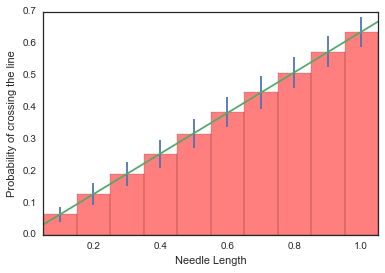

In [152]:
plt.bar(left = needle_lengths-0.05, height = [x[0] for x in probs], width = 0.1, 
        alpha=0.5, color = 'red', yerr=[x[1] for x in probs])
plt.xlim((0.05, 1.05))
lin = np.linspace(0.05,1.05,100)
needle_prob = lambda l: 2*l/(t*np.pi)
plt.plot(lin, [needle_prob(l) for l in lin])
plt.xlabel("Needle Length")
plt.ylabel("Probability of crossing the line");

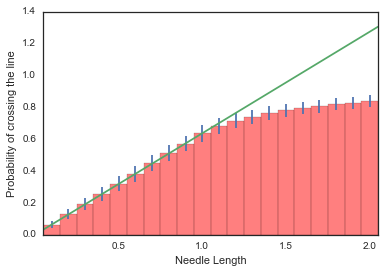

In [153]:
t=1.
needle_lengths = np.arange(0.1,2.1,0.1)
number_of_tries = 1000
number_of_samples = 100

probs = []

for l in needle_lengths:
    P=np.zeros(number_of_tries)
    for i in range(number_of_tries):
        sample_estimates = np.zeros(number_of_samples)
        for k in range(number_of_samples):
            # Randomly pick angle and distance from midpoint to line
            angle = np.random.uniform(low=0, high=np.pi/2.)
            x = np.random.uniform(low=0, high =t/2.)
            # Add the truth value of the intersection
            sample_estimates[k]= (l/2. >= x/np.sin(angle))
        P[i]= np.sum(sample_estimates)/number_of_samples
    probs.append([np.mean(P), np.std(P)])
    
plt.bar(left = needle_lengths-0.05, height = [x[0] for x in probs], width = 0.1, 
        alpha=0.5, color = 'red', yerr=[x[1] for x in probs])
plt.xlim((0.05, 2.05))
lin = np.linspace(0.05,2.05,100)
needle_prob = lambda l: 2*l/(t*np.pi)
plt.plot(lin, [needle_prob(l) for l in lin])
plt.xlabel("Needle Length")
plt.ylabel("Probability of crossing the line");

### Between a needle length of 0.1 and 1, the probability increases linearly, but for longer needles the probability asymptotically approaches 1.  

### The original function starts to overestimate the number of line crosses because the integral that was used to produce the analytical solution for a needle lengths less than one calculates over the wrong range of possible x values.  Once the needle is longer than the distance between the lines, the upper bound of the integral over x needs to be set to the minimum of the original upper bound and half the distance between the lines.  This is because if the original upper bound is more than half the distance between the lines, we start to "double count" crosses that we have already been accounted for by symmetry.  

# Problem 2: Simple Integration

Write a function that estimates the value of a given one dimensional integral Monte Carlo style. 
The function should have the following signature:

`estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries)`

Where `number_of_tries` is used to calculate the standard deviation of the estimated value of the integral. 

Test your function by solving the following integrals:

* $ \int_0^3 x^{\frac{x}{4}} \,dx$
* $ \int_0^1 \log x \cdot \log(1-x) \,dx $.


**Please answer this problem by adding cells here.**

In [154]:
number_of_samples=1000
number_of_tries=1000
def estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries):
    sims = [] # Array of integral estimates for each try
    for t in range(number_of_tries):
        values=[] # Array of function values for each sample
        for sample in range(number_of_samples):
            x = np.random.uniform(low=lower_bound, high=upper_bound)
            value = function_to_integrate(x)
            values.append(value)
        integral = np.mean(values)*(upper_bound - lower_bound)
        sims.append(integral)
    estimate = np.mean(sims)
    stddev = np.std(sims)
    return estimate, stddev

In [155]:
def func1(x):
    return x**(x/4.)
def func2(x):
    return np.log(x)*np.log(1-x)

In [156]:
a,b = estimate_integral_MC(func1, 0, 3, 1000, 1000)
print "Integral of first function: ", a, " , Standard deviation: ", b

Integral of first function:  3.91604414287  , Standard deviation:  0.0382176158663


In [157]:
a,b = estimate_integral_MC(func2, 0, 1, 1000, 1000)
print "Integral of second function: ", a, " , Standard deviation: ", b

Integral of second function:  0.355016172753  , Standard deviation:  0.00390425076536


# Problem 3: The Donut Estimation

You bought a nice donut for yourself and decided to eat it in the evening while working on your AM207 assignments. 
Unfortunately you live in a shared apartment and your roommate got hold of the donut in the kitchen. It seems that he first
cut off a small piece from the bottom, but then discovered how delicious the donut was and proceeded to cut off an additional large part. Discovering the donut theft in the evening you decide to confront your roommate, but you want to present hard facts and estimate how much of your original donut was left. 

Think of the donut as a 3D object(refer to the following picture). You model the donut as a torus centered at the origin`(0,0,0)` with outer radius `R=4` and inner radius `r=2`. Points $(x,y,z)$ inside the torus then are described by the following condition: 
$$z^2 + (\sqrt{x^2 + y^2} - c)^2 \leq a^2,$$
where $c$ is the radius from origin to the center of the torus tube, and $a$ is the radius of the donut tube, the cross section of the donut tube is a circle.

Your roomates cuts were first parallel to the x axis at y = -3, and then parallel to the y axis at x = 1.

To estimate the weight of the donut you need to solve the integral

$$ \int_V \rho \,dx \,dy \,dz $$.

Where $\rho$ is the density of the donut and $V$ is the volume. As you are just interested in the percentage of the whole donut you got to eat, you can just assume $\rho=1$.

The weight of the whole original donut then was:

$$ (\pi a^2)\cdot(2 \cdot \pi \cdot c) $$

What is the percentage of the donut your room mate left for you to eat? Don't forget to estimate the error as well!




**Please answer this problem by adding cells here.**

In [158]:
def original_donut(x,y,z):
    return (z**2 + (np.sqrt(x**2 + y**2) - 3)**2 <= 1**2)
# Returns booleans indicating whether a point is in the original donut or not

In [159]:
%%time
number_of_tries=1000
number_of_samples=1000
original_volume = np.pi*1**2 * (2 * np.pi * 3)

sims=[]
for t in range(number_of_tries):
    values=[]
    for sample in range(number_of_samples):
        # Sample from within the cut-up donut
        x = np.random.uniform(low=-4, high=1)
        y = np.random.uniform(low=-3, high=4)
        z = np.random.uniform(low=-1, high=1)
        value = original_donut(x,y,z)
        values.append(value)
    # Integral is the proportion that fall in the donut times the volume of the box the points were sampled from.  
    integral = (5*7*2)*np.sum(values)/np.float(number_of_samples)
    sims.append(integral/original_volume)
estimate = np.mean(sims)
stddev = np.std(sims)
print "% left by roommate: {:.2%}, standard deviation: {:.2%}".format(estimate, stddev)

% left by roommate: 54.04%, standard deviation: 1.83%
CPU times: user 3.18 s, sys: 45.2 ms, total: 3.22 s
Wall time: 3.2 s


# Problem 4: New Years Resolutions

A lot of people pledge to get more active in the new year. Unfortunately these resolutions often are short lived. We model the probability distribution of personal fitness over the months of a year with a skewed distribution:

$ P(t) = \lambda \frac{(t-0.9)}{(t-1)^2 + 1}, \; 1 \leq t \leq 12 $

$ P(t) = 0 \; otherwise$

Where $t=1$ corresponds to January, $t=2$ corresponds to February, etc.. $\lambda$ is a normalization constant, and t is measured in months ($t$ only takes integer values). 

* Plot the given distribution and compute the normalization factor
* Sample $10^5$ samples from the distribution given above using rejection sampling. 
* Plot the histogram of the simulated samples and compare it to the true distribution (hint: It's easiest to use the normalization factor computed above and then plot the normed version of the histogram against it.
* Repeat the first two steps using the inverse transform instead of rejection sampling. Do not bother with getting the anti-derivative analytically. Just build a lookup table for it. 
* Compare the execution time of both methods. Which one is faster and why? When would you prefer a lookup table and when an analytical solution to the anti-derivative?

**Please answer this problem by adding cells here.**

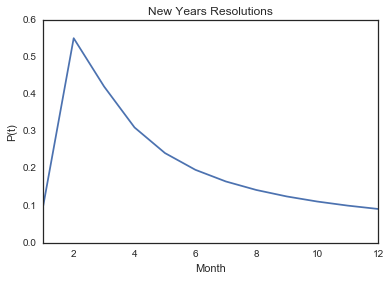

In [160]:
N=10**5
months=np.array(range(1,13))
p = lambda t: (t-0.9)/((t-1)**2+1)
y=[p(t) for t in months]
plt.plot(months,y)
plt.xlim((1,12))
plt.xlabel('Month')
plt.ylabel('P(t)')
plt.title('New Years Resolutions');

In [163]:
integral = np.sum(y)
norm_factor = 1/integral
norm_factor
p_normed = lambda x: norm_factor * p(x)
print "Normalization Factor: {:.2}".format(norm_factor)

Normalization Factor: 0.39


Total samples drawn:  259010
Number of accepted samples:  100000
CPU times: user 1.6 s, sys: 16.7 ms, total: 1.62 s
Wall time: 1.62 s


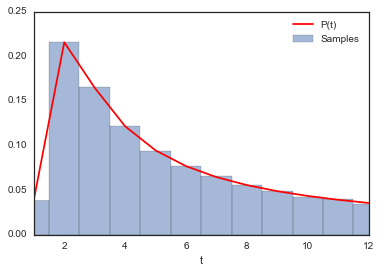

In [164]:
%%time

#### Rejection Sampling

xmin = 1
xmax = 12
ymax = p_normed(2)
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # pick a random month
    x = np.random.choice(months)
    
    # pick a uniform number on [0, ymax)
    y = np.random.uniform(0,ymax)
    
    # Do the accept/reject comparison
    if y < p_normed(x):
        samples[accepted] = x
        accepted += 1
    
    count +=1
    
print "Total samples drawn: ", count
print "Number of accepted samples: ", accepted

# Plot the histogram with bins centered at the month values
plt.hist(samples, bins=np.arange(0.5,13,1), label=u'Samples', alpha=0.5, normed=True);
# Plot our (normalized) function
plt.plot(months, p_normed(months), 'r', label=u'P(t)')
plt.xlabel("t")
plt.xlim((1,12))
# Turn on the legend
plt.legend()

CPU times: user 575 ms, sys: 5.22 ms, total: 580 ms
Wall time: 579 ms


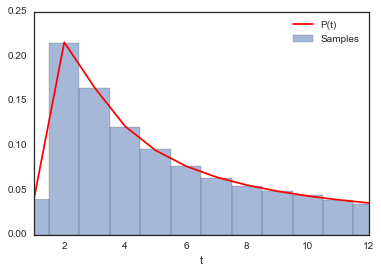

In [165]:
%%time

#### Inverse Transform

cdf = np.zeros(12)
cdf = lambda x: np.sum(p_normed(months[0:x])) 
lookup = {cdf(x):x for x in months}
def inverseCDF(x):
    for key in np.sort(lookup.keys()):
        if x <= key: return lookup[key]
    return -1

R = np.random.choice(lookup.keys(), N)
R = np.random.uniform(0,1,N)

X = np.array([inverseCDF(x) for x in R])
plt.hist(X, bins = np.arange(0.5,13,1), label = u'Samples', alpha=0.5, normed=True)
plt.plot(months, p_normed(months), 'r', label=u'P(t)')
plt.xlabel("t")
plt.xlim((1,12))
# turn on the legend
plt.legend()

### The inverse transform method is faster because we can look values up instead of calculating them.  We would prefer to use the lookup table when the function has discrete values, so the lookup table is finite.  However, we would prefer to use rejection sampling when the antiderivative of the cdf is not so straightforward to create, as it would be for a multidimensional continuous function.  

# Problem 5: Give it all!

Estimate the following integral:

$ \int_{-1}^{1} \int_{-1}^{1}  f(x,y) \,dx \,dy$, with 

$g_1(x,y) = -(x+0.4)^2 - (y+0.4)^2 + 0.1$

$g_2(x,y) = -(x-0.4)^2 - (y-0.4)^2 + 0.05$

$f(x,y) = \max(g_1(x,y), 0) + \max(g_2(x,y), 0)$


First use basic Monte Carlo estimation. Then apply different variance reduction techniques we discussed in the lecture: 
* stratified sampling, 
* control variates, 
* importance sampling

For each technique give a short explanation of how you are applying it to the problem. Implement the different techniques and then make a table and compare the results with respect to run-time and error in the estimate. 

You can choose to also either apply and explain antithetic variates, or explain why you don't think they are useful in this case, and how they could benefit of being combined with one of the techniques listed above. 

**Please answer this problem by adding cells here.**

In [124]:
g1 = lambda x,y: -(x+0.4)**2 - (y+0.4)**2 + 0.1
g2 = lambda x,y: -(x-0.4)**2 - (y-0.4)**2 + 0.05
f = lambda x,y: np.maximum(g1(x,y),0) + np.maximum(g2(x,y),0)
number_of_tries=1000
number_of_samples=1000

### Basic Monte Carlo:

### 1. Sample uniformly from the x and y range of the function to integral.   
### 2. Using the Mean Value Theorem (MVT), calculate the mean function value from the sample space to get the average height, and multiply this by the area of the sample space to get a volume for the integral.  

In [184]:
time1=time.time()
sims_basic = np.zeros(number_of_tries)
for i in range(number_of_tries):
    x = np.random.uniform(low=-1, high=1, size = number_of_samples)
    y = np.random.uniform(low=-1, high=1, size = number_of_samples)
    sims_basic[i] = np.mean(f(x,y))*2*2
print "Mean: {:.4}".format(np.mean(sims_basic))
print "Standard Deviation: {:.3}".format(np.std(sims_basic)) 
time_basic = time.time() - time1
print "Time: {:.4}".format(time_basic), "seconds"


Mean: 0.01967
Standard Deviation: 0.00201
Time: 0.08463 seconds


### Stratified Sampling

### 1. Split the sample space up into an evenly spaced grid, and sample an equal number of points from each grid square.  This uniformly distributes the samples within the sample space and samples the function more evenly than the vanilla method.  
### 2. As above, apply MVT and multiply the mean function value and the area of the sample space to estimate the integral.  

In [185]:
time1=time.time()

# I create a 10X10 grid of squares that are 0.2 units on a side
step = 0.2
sims_stratified = np.zeros(number_of_tries)

for i in np.arange(0,number_of_tries):
    #Array to store samples from strata
    samples=[]
    for k in np.arange(-1,1,step):
        for m in np.arange(-1,1,step):
            # sample uniform values within each grid square
            x = np.random.uniform(k,k+step,number_of_tries)
            y = np.random.uniform(m,m+step,number_of_tries)
            samples.append(f(x,y))
    sims_stratified[i] = np.mean(samples)*2*2
print "Mean: {:.4}".format(np.mean(sims_stratified))
print "Standard Deviation: {:.3}".format(np.std(sims_stratified)) 
        

time_stratified = time.time() - time1
print "Time: {:.4}".format(time_stratified), "seconds"

Mean: 0.01964
Standard Deviation: 8.45e-05
Time: 7.175 seconds


### Control Variates

### 1. Select a function with a similar shape to the function to integrate, that also has lower variance.  This function will be used to transform sampled values and more accurately estimate the integral using our prior knowledge of the similarly shaped function.  In this case, I used a pair bivariate Gaussians that were similarly shaped to the original function.  I selected these Gaussians by setting their means at the centers of the parabolas defined above.  I completed the importance sampling implementation before the control variates, and in that section I explain how I picked the covariance matrices for these Gaussians.   
### 2. Sample uniformly across the sample space.  
### 3. Instead of taking the mean of the sampled function values, calculate the mean of (function_values + b * Gaussian_pair_value - expected_value_of_the_Gaussian_pair).  This transforms the samples and takes advantage of the known value of the Gaussian integral (calculated using scipy.stats.mvn.mvnum).  
### 4. As before, multiply this transformed expected value by the area to get the integral value

In [171]:
time1=time.time()

means1 = [-0.4,-0.4]
means2 = [0.4,0.4]
cov1 = [[0.02,0],[0,0.02]]
cov2 = [[0.02,0],[0,0.02]]

g_1 = lambda x: scipy.stats.multivariate_normal.pdf(x,means1,cov1)
g_2 = lambda x: scipy.stats.multivariate_normal.pdf(x,means2,cov2)
g = lambda x: g_1(x)+g_2(x)

# Tau is the expected value, in this case average height: the volume of g divided by the area of its base.
tau = (scipy.stats.mvn.mvnun([-1,-1],[1,1],means1,cov1)[0] + \
                scipy.stats.mvn.mvnun([-1,-1],[1,1],means2,cov2)[0])/4.

sims_control = np.zeros(number_of_tries)
for i in range(number_of_tries):
    x=np.random.uniform(low=-1,high=1,size=number_of_samples)
    y=np.random.uniform(low=-1,high=1,size=number_of_samples)
    fs = f(x,y)
    gs = g(np.vstack([x,y]).T)
    b= -np.cov(fs,gs)[0,1]/np.var(gs)
    sims_control[i] = 2*2*np.mean(fs+b*(gs-tau))
    
print "Mean: {:.4}".format(np.mean(sims_control))
print "Standard Deviation: {:.3}".format(np.std(sims_control)) 
        

time_control = time.time() - time1
print "Time: {:.4}".format(time_control), "seconds"

Mean: 0.01968
Standard Deviation: 0.00104
Time: 0.4835 seconds


### Importance Sampling

### 1. Instead of sampling uniformly from the sample space, sample more in places where the probability mass of the function is higher.  I plotted the function to gain some intuition about the probability mass distribution of the function.  

In [172]:
X=np.array([x for x in np.arange(-1,1,0.1) for y in np.arange(-1,1,0.05)])

In [173]:
Y=np.array([y for x in np.arange(-1,1,0.1) for y in np.arange(-1,1,0.05)])

In [174]:
X_m,Y_m = np.meshgrid(X,Y)
Z = f(X_m,Y_m)

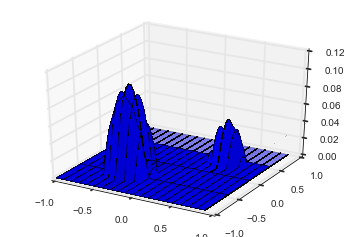

In [175]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X_m,Y_m,Z, alpha=0.5)
plt.show()

### 2. We see two humps centered at (-0.4,-0.4) and (0.4,0.4).  One is taller than the other, and most of the sample space has a function value of zero because it is the maximum of the functions and 0.  We don't want to sample in places where the function value is zero because these regions contribute no probability mass, so we will want to pick a pdf with thin tails in these areas.  A combination of Gaussians would be a good choice because they will center probability mass where we want, and have thin tails everywhere else.  
### 3. We can pick the centers easily in the function definition.  Below, I used the 3-d scatterplot to tune the covariance matrices to get distributions that closely match the original function.  The original function is composed of radially symmetrical parabola rotations, so I will leave the off-diagonal entries of the covariance matrices equal to zero.  
### 4. Through trial and error, we select the diagonal entries of the covariance matrices to tighten the Gaussians up to match the shape that is visible in the plot above.  
### 5. Again through trial and error, we experiment with weights for each Gaussian to put more probability mass in the area of the original function's taller mode.  

In [176]:
n1 = scipy.stats.multivariate_normal([-0.4,-0.4],[[.02,0],[0,.02]])

In [177]:
n2 = scipy.stats.multivariate_normal([ 0.4, 0.4],[[.02,0],[0,.02]])

In [178]:

Znorm = 0.7*n1.pdf(zip(X,Y)) + 0.3*n2.pdf(zip(X,Y))

<function matplotlib.pyplot.show>

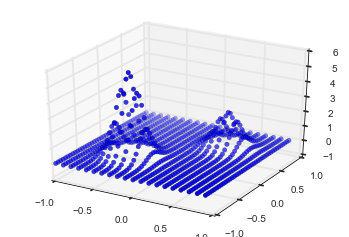

In [179]:
fig = plt.figure()
ax=fig.gca(projection='3d')
surf = ax.scatter(X,Y,Znorm)
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
plt.show

### 6. With these parameters tuned, we run the simulations much as above.  This time, however, more samples are taken near the areas of high probability density of the function.  This is corrected for by dividing each function value by the probability mass at that location of the importance functions, and multiplying by the integral of the importance functions.  

In [211]:
number_of_tries=1000
number_of_samples=1000

In [212]:
time1=time.time()

# Parameters of the Gaussians.  
means1 = [-0.4,-0.4]
means2 = [0.4,0.4]
cov1 = [[0.02,0],[0,0.02]]
cov2 = [[0.02,0],[0,0.02]]
# Weight of the more important Gaussian
weight = 0.7

# Probability density of the importance function, used to correct for the uneven sampling.  
p1 = lambda x: scipy.stats.multivariate_normal.pdf(x,means1,cov1)
p2 = lambda x: scipy.stats.multivariate_normal.pdf(x,means2,cov2)
p = lambda x: weight*p1(x)+(1-weight)*p2(x)

# Normalization contant, used to correct for the volume of the importance function we sampled from.  
# In this case, the constant is nearly 1, but with different parameters, not including this could have biased
#    our estimations.  
normal = scipy.stats.mvn.mvnun([-1,-1],[1,1],means1,cov1)[0]*weight + \
            scipy.stats.mvn.mvnun([-1,-1],[1,1],means2,cov2)[0]*(1-weight)

sims_importance = np.zeros(number_of_tries)
for i in np.arange(0,number_of_tries):
    
    #Array to store samples from strata
    samples=np.zeros((number_of_samples,2))
    
    for k in range(number_of_samples):
        # Initialize samples with nonsense, out-of-range values that will be written over.  
        this = np.array([-4,-4])
        
        # Sample only from within the sample space, not the whole range of the Gaussians.  
        while np.any([(this[0]<-1), (this[1]<-1), (this[0]>1), (this[1]>1)]):
            
            # Use the weights to sample more from the Gaussian corresponding to the higher mode.  
            if np.random.choice([0,1], p=[1-weight,weight]) > 0:
                this = np.random.multivariate_normal(means1,cov1,size=1)[0]    
            else: 
                this = np.random.multivariate_normal(means2,cov2,size=1)[0]
                
        # Probability density of the sampled point, used below to transform the sampled function values.  
        p_of_x = p(this)
        samples[k] = f(this[0],this[1])/p_of_x
        
    # The value for each try is corrected for the probability mass function and the normalization constant.  
    sims_importance[i] = np.mean(samples)*normal

print "Mean: {:.4}".format(np.mean(sims_importance))
print "Standard Deviation: {:.3}".format(np.std(sims_importance)) 
        

time_importance = time.time() - time1
print "Time: {:.4}".format(time_importance), "seconds"

Mean: 0.01964
Standard Deviation: 0.000299
Time: 369.7 seconds


## Summary Table

In [213]:
# Make a pandas df of the results
import pandas as pd
df = pd.DataFrame([[np.mean(sims_basic), np.std(sims_basic), time_basic],
                   [np.mean(sims_stratified), np.std(sims_stratified), time_stratified],
                   [np.mean(sims_control), np.std(sims_control), time_control],
                   [np.mean(sims_importance), np.std(sims_importance), time_importance]])

In [214]:
# Make column and row labels
df.columns=(["Estimate", "Error", "Time (s)"])
df.index=(["Basic", "Stratified", "Control Variates", "Importance"])

In [215]:
# Clean up decimals
df.applymap(lambda x: "{0:.4f}".format(x))

,Estimate,Error,Time (s)
Basic,0.0197,0.0020,0.0846
Stratified,0.0196,0.0001,7.1752
Control Variates,0.0197,0.0010,0.4835
Importance,0.0196,0.0003,369.6929


### I used the same number of tries and samples/try for all methods to make them comparable.  
### The basic method was fastest, but had the highest error.  
### The stratified sampling was the most accurate but second-most time-consuming.  
### Control variates was twice as accurate as basic, but took six times as long.  
### Importance sampling was very accurate, but extremely time-consuming.  This time could probably be reduced somewhat by optimizing the code, but I suspect that sampling from the multi-variate normal distributions is inherently expensive.  


### As for antithetic variates, the function is not monotonic, but perhaps with some kind of transformation we could take advantage of a better sampling method using anthithetical variates.  
### The two modes are radially symmetrical, so we could probably exploit this by pairing points along the cross-sections of the peaks.  For example, a that is 0.01 units from the peak of the mode could be paired with a point that is 0.01 units from the edge where the curve flattens out.  Points could be paired between the radius of the intersection of the paraboloid with the plane and the vertex of the paraboloid.  If we considered just cross-sections of the paraboloids, we would then have to use a transformation to account for the smaller radius of the circles that correspond to the points sampled near the peak as compared to the points sampled near the base.  